In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
#import math

**Example** Consider the inconsistent linear system
$$\begin{align}
x_1+2x_2=&1,\\
2x_1+3x_2=&2,\\
x_1=&-1.
\end{align}$$
We want to find the least squares estimate of this system.

First, we find x_ls using matrix operations:

In [2]:
A = np.array([[1, 2], [2, 3], [1, 0]])
b = np.array([1, 2, -1])

In [3]:
# The @ sign denotes matrix multiplication.
AtA = A.transpose()@A
Atb = A.transpose()@b.T

In [4]:
x_ls = np.linalg.inv(AtA)@Atb
x_ls

array([-0.85714286,  1.14285714])

Now, we use numpy to get x_ls with one line of code:

In [5]:
x_ls2 = np.linalg.lstsq(A,b, rcond=None)[0]
x_ls2

array([-0.85714286,  1.14285714])

**Example** Consider 30 points in $\mathbf{R}^2$ with $x$-coordinates being $x_i=(i-1)/29$, for $i=1,2,\dots, 30$, and $y$-coordinates being $y_i=2x_i+1+\epsilon_i$. $\epsilon_i$ is randomly generated from a standard normal distributtion with zero mean and standard deviation of $0.1$. 

In [6]:
np.random.seed(seed=0)

In [7]:
x = np.linspace(0, 1, 30)
y = 2*x + 1 + 0.1 * np.random.randn(30)

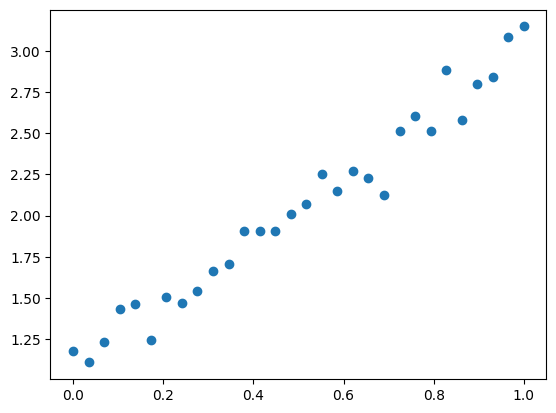

In [8]:
plt.scatter(x,y)

In [9]:
A =  np.array([np.ones(30), x]).T

In [10]:
x_ls = np.linalg.lstsq(A,y, rcond=None)[0]
## The obtained estimates x_ls should be very close to the tru value [2, 1]. 
print(x_ls)

[1.08291658 1.92273814]


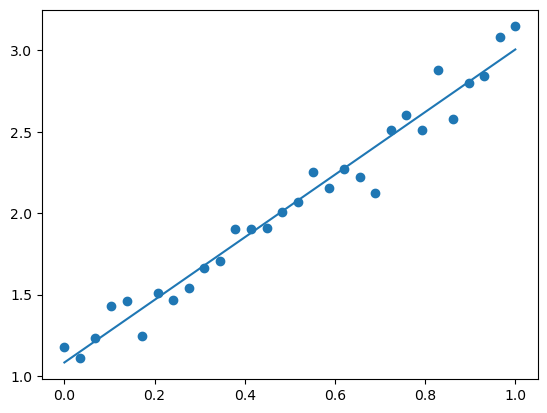

In [11]:
plt.plot(x, A@x_ls)
plt.scatter(x,y)

In [12]:
x_ls

array([1.08291658, 1.92273814])

**Example** Non-linear fitting

In [13]:
x = np.linspace(0, 1, 30)
y = 2*x**2 + x + 1 + 0.1 * np.random.randn(30)

In [14]:
A =  np.array([ np.ones(30), x, x*x, x**3, x**4]).T
x_ls = np.linalg.lstsq(A,y, rcond=None)[0]

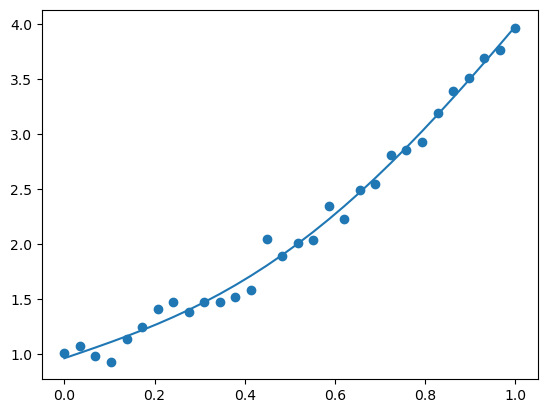

In [15]:
plt.plot(x, A@x_ls)
plt.scatter(x,y)
plt.show()